In [1]:
df_raw = pd.read_csv('../train.csv')
df_raw.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [2]:
def isstr(col):   ##  데이터가 문자인 컬럼을 찾는 함수
    if type(col[0]) == str:
        return True
strcolum_name=[]
i=0
col_names = df_raw.columns
for col in col_names:  ## 데이터가 문자인 컬럼의 행번호 추출 
    if isstr(df_raw[col]):
        strcolum_name.append(i)
    i+=1
strcolum_name.append(80) ## 추출된 행번호에 SalePrice의 행번호 추가

In [3]:
df_str = df_raw.iloc[:, strcolum_name] ## 데이터가 문자인 컬럼만 추출
df_str.tail()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,175000
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal,210000
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,266500
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal,142125
1459,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,...,TA,Typ,Attchd,Fin,TA,TA,Y,WD,Normal,147500


In [4]:
# 빈도 표와 두종류의 plot을 함께 출력
def show_viobox(df):
    col_names = df_str.columns[0:-1]
    for col_name in col_names:
        print(col_name)
        
        # 각 항목에 대한 빈도 출력 / df2 dataframe 따로 생성
        df2 = pd.DataFrame(df[col_name])
        counts = df2.groupby([col_name]).size().reset_index(name='Counts')
        print(counts)
        
        # 알파벳 오름차순으로 정렬. 범례 그리지 않는 대신 순서로 각 그래프를 파악
        plot_order = df_str[col_name].sort_values().unique()
        
        plt.subplot(121)
        sns.violinplot(x=col_name, y='SalePrice', data=df_str, order=plot_order)
        plt.subplot(122)
        sns.boxplot(x=col_name, y='SalePrice', data=df_str, order=plot_order)
        plt.show()       

MSZoning
  MSZoning  Counts
0  C (all)      10
1       FV      65
2       RH      16
3       RL    1151
4       RM     218


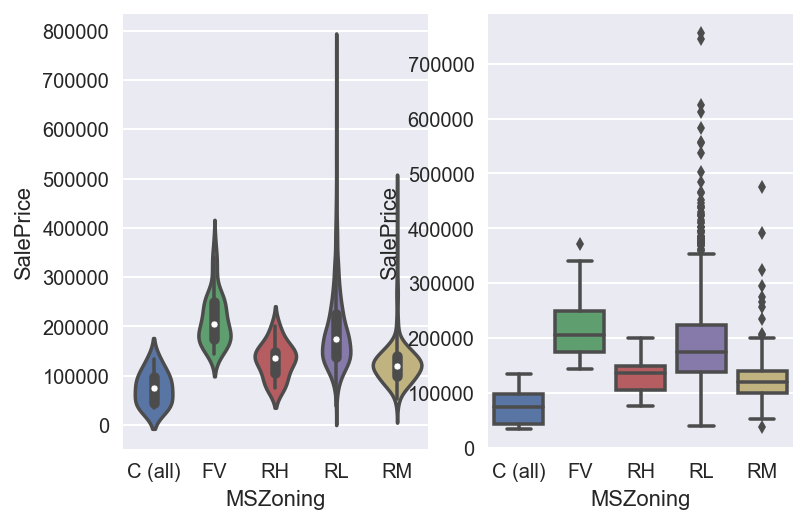

Street
  Street  Counts
0   Grvl       6
1   Pave    1454


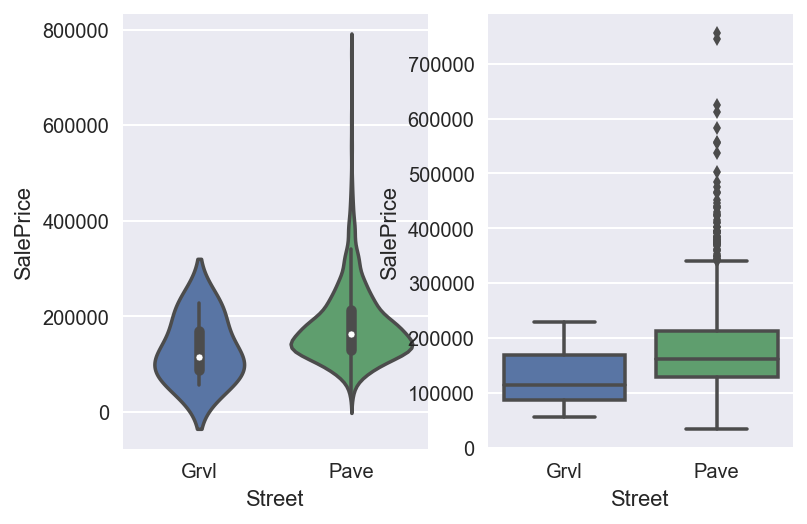

LotShape
  LotShape  Counts
0      IR1     484
1      IR2      41
2      IR3      10
3      Reg     925


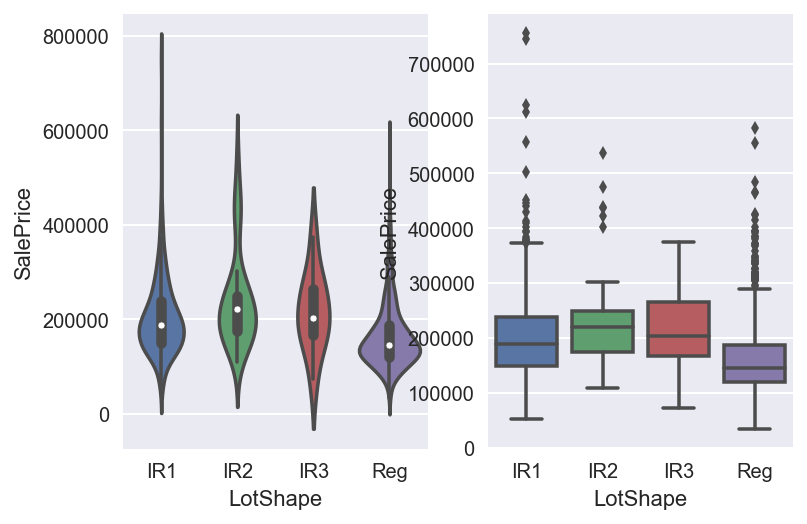

LandContour
  LandContour  Counts
0         Bnk      63
1         HLS      50
2         Low      36
3         Lvl    1311


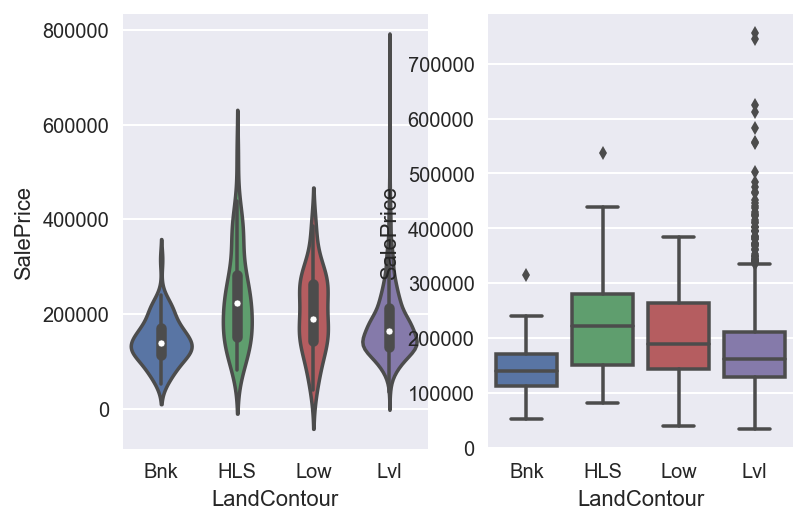

Utilities
  Utilities  Counts
0    AllPub    1459
1    NoSeWa       1


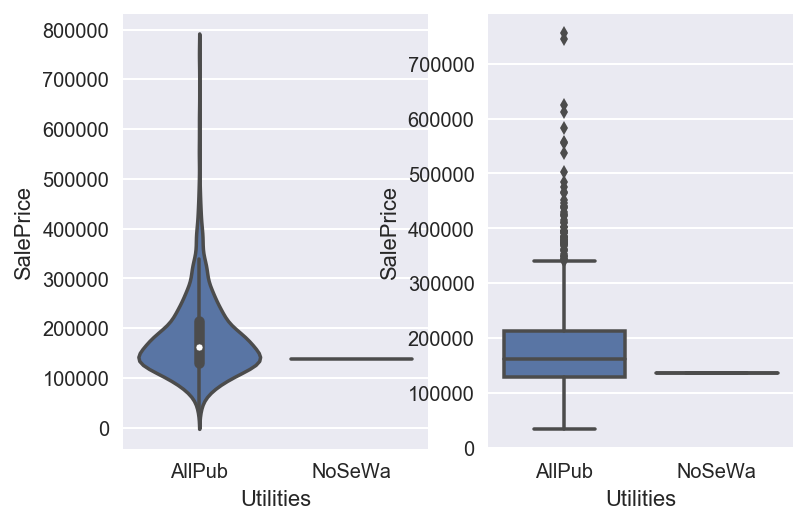

LotConfig
  LotConfig  Counts
0    Corner     263
1   CulDSac      94
2       FR2      47
3       FR3       4
4    Inside    1052


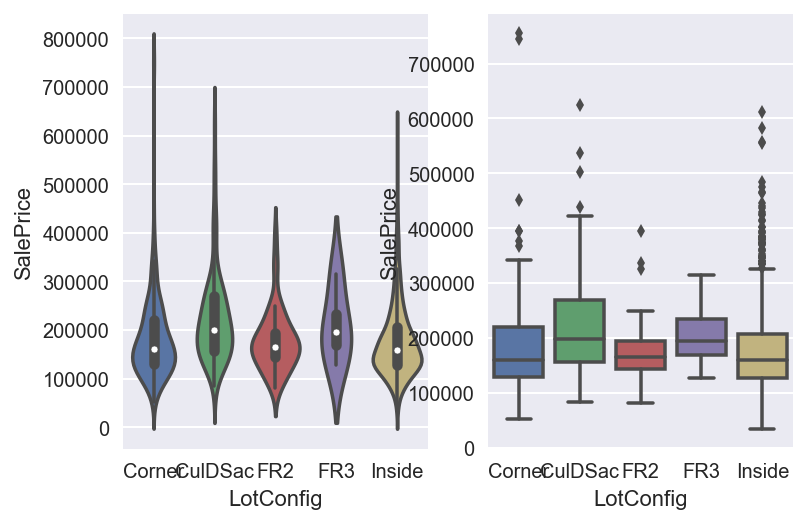

LandSlope
  LandSlope  Counts
0       Gtl    1382
1       Mod      65
2       Sev      13


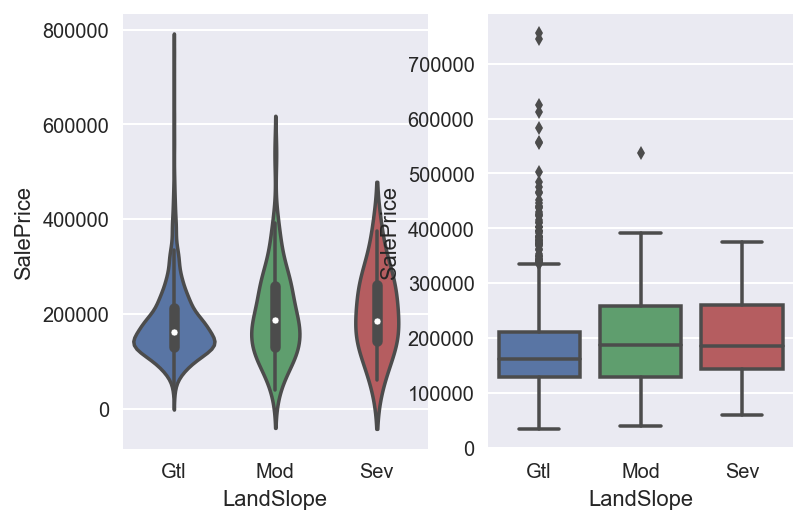

Neighborhood
   Neighborhood  Counts
0       Blmngtn      17
1       Blueste       2
2        BrDale      16
3       BrkSide      58
4       ClearCr      28
5       CollgCr     150
6       Crawfor      51
7       Edwards     100
8       Gilbert      79
9        IDOTRR      37
10      MeadowV      17
11      Mitchel      49
12        NAmes     225
13      NPkVill       9
14       NWAmes      73
15      NoRidge      41
16      NridgHt      77
17      OldTown     113
18        SWISU      25
19       Sawyer      74
20      SawyerW      59
21      Somerst      86
22      StoneBr      25
23       Timber      38
24      Veenker      11


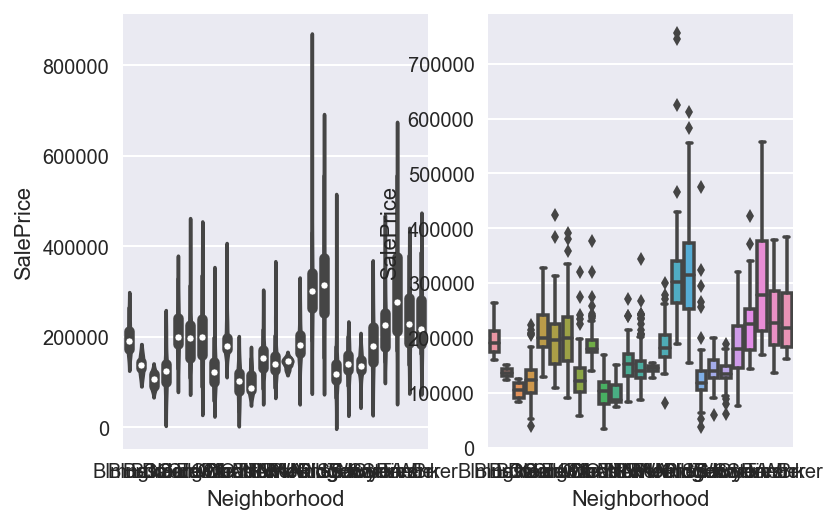

Condition1
  Condition1  Counts
0     Artery      48
1      Feedr      81
2       Norm    1260
3       PosA       8
4       PosN      19
5       RRAe      11
6       RRAn      26
7       RRNe       2
8       RRNn       5


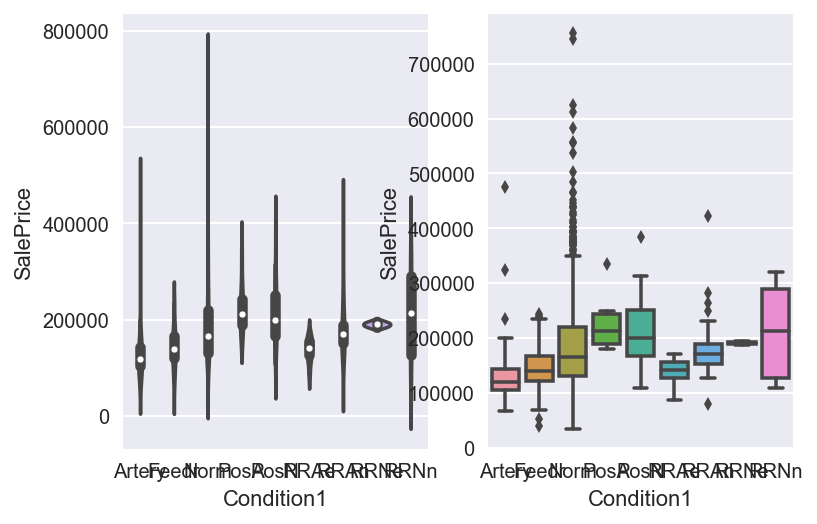

Condition2
  Condition2  Counts
0     Artery       2
1      Feedr       6
2       Norm    1445
3       PosA       1
4       PosN       2
5       RRAe       1
6       RRAn       1
7       RRNn       2


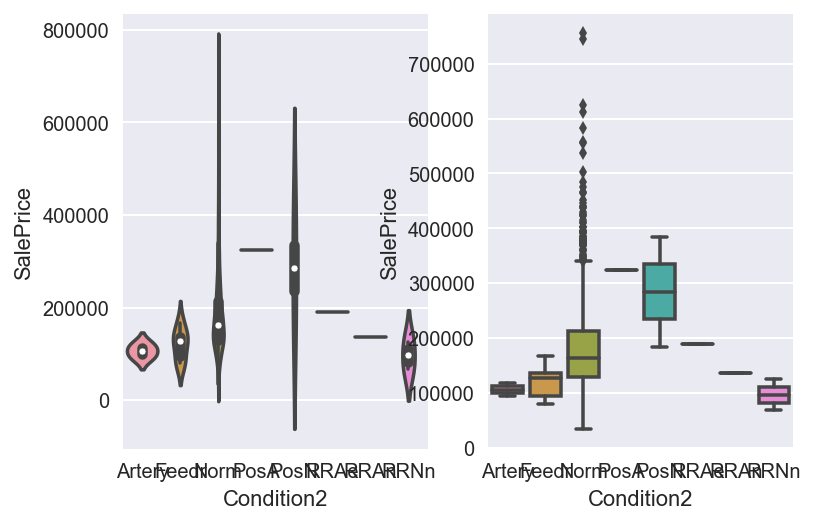

BldgType
  BldgType  Counts
0     1Fam    1220
1   2fmCon      31
2   Duplex      52
3    Twnhs      43
4   TwnhsE     114


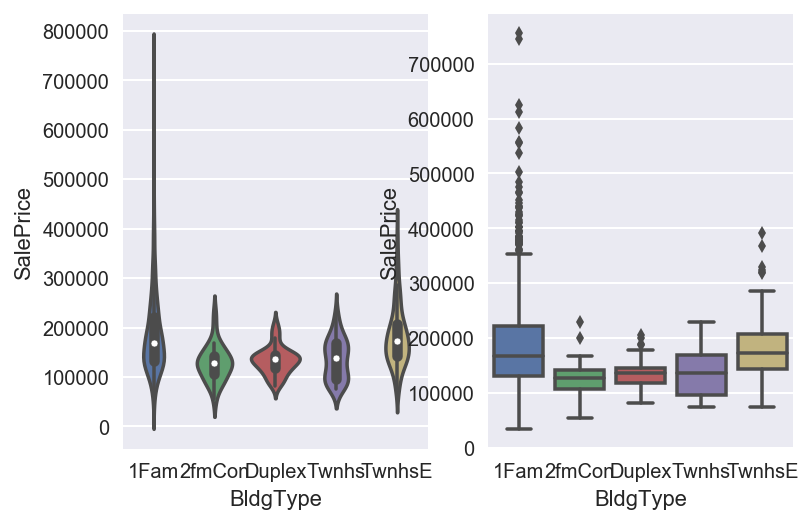

HouseStyle
  HouseStyle  Counts
0     1.5Fin     154
1     1.5Unf      14
2     1Story     726
3     2.5Fin       8
4     2.5Unf      11
5     2Story     445
6     SFoyer      37
7       SLvl      65


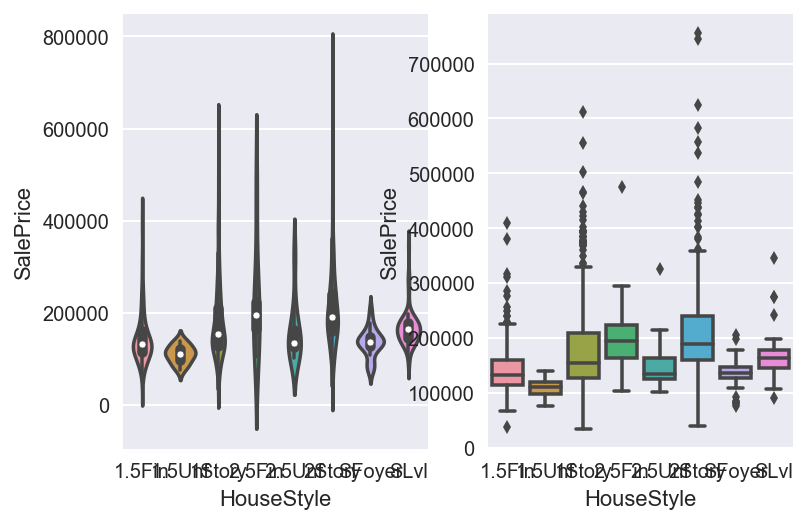

RoofStyle
  RoofStyle  Counts
0      Flat      13
1     Gable    1141
2   Gambrel      11
3       Hip     286
4   Mansard       7
5      Shed       2


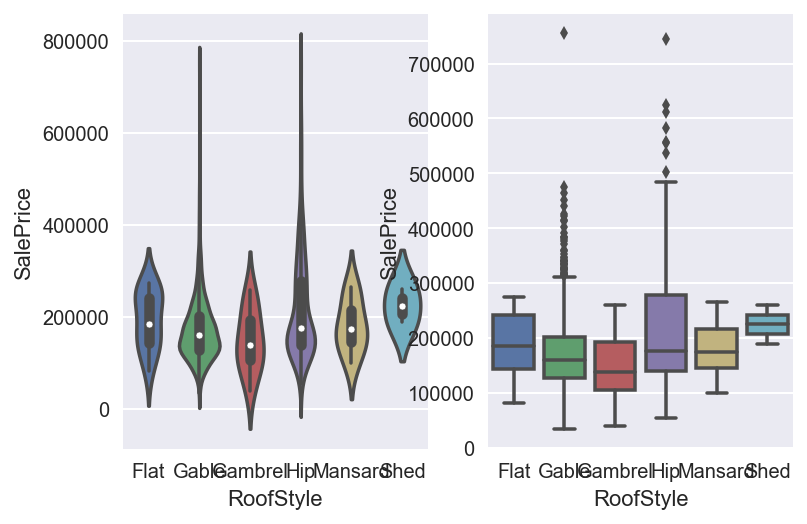

RoofMatl
  RoofMatl  Counts
0  ClyTile       1
1  CompShg    1434
2  Membran       1
3    Metal       1
4     Roll       1
5  Tar&Grv      11
6  WdShake       5
7  WdShngl       6


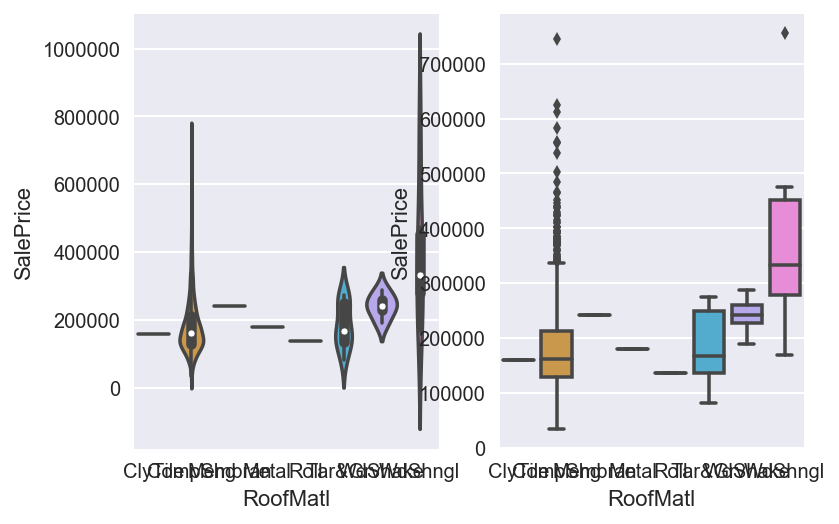

Exterior1st
   Exterior1st  Counts
0      AsbShng      20
1      AsphShn       1
2      BrkComm       2
3      BrkFace      50
4       CBlock       1
5      CemntBd      61
6      HdBoard     222
7      ImStucc       1
8      MetalSd     220
9      Plywood     108
10       Stone       2
11      Stucco      25
12     VinylSd     515
13     Wd Sdng     206
14     WdShing      26


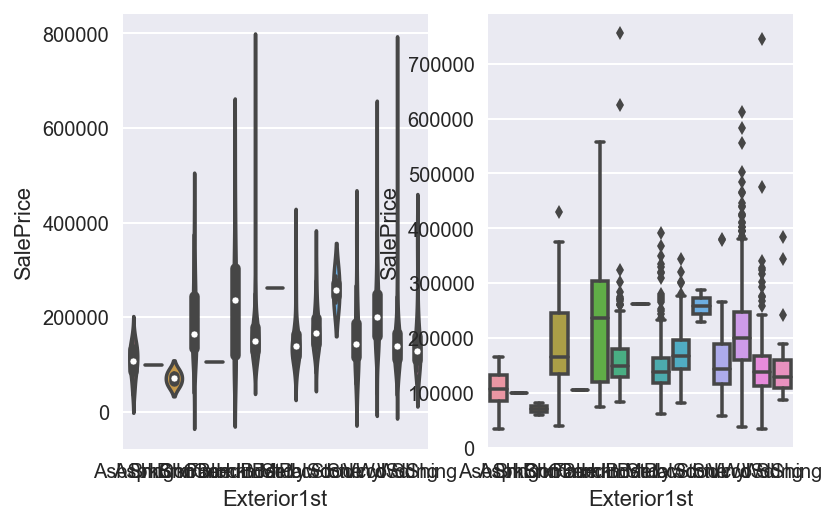

Exterior2nd
   Exterior2nd  Counts
0      AsbShng      20
1      AsphShn       3
2      Brk Cmn       7
3      BrkFace      25
4       CBlock       1
5      CmentBd      60
6      HdBoard     207
7      ImStucc      10
8      MetalSd     214
9        Other       1
10     Plywood     142
11       Stone       5
12      Stucco      26
13     VinylSd     504
14     Wd Sdng     197
15     Wd Shng      38


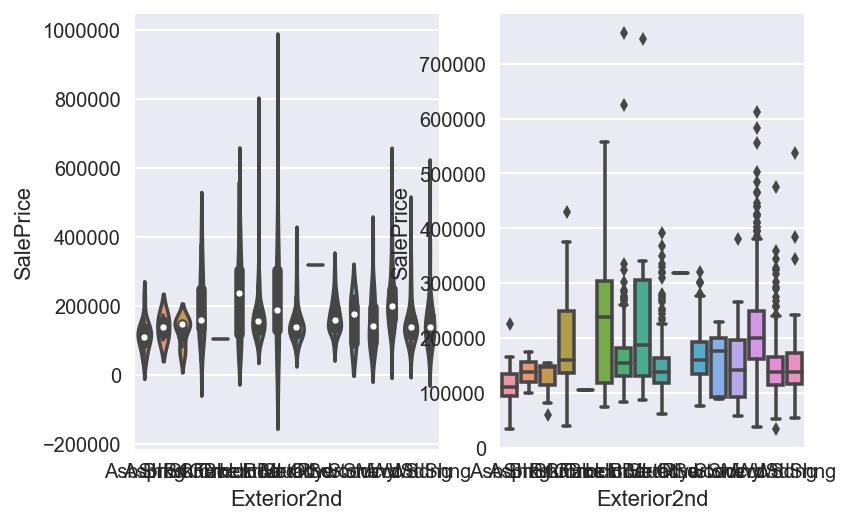

MasVnrType
  MasVnrType  Counts
0     BrkCmn      15
1    BrkFace     445
2       None     864
3      Stone     128


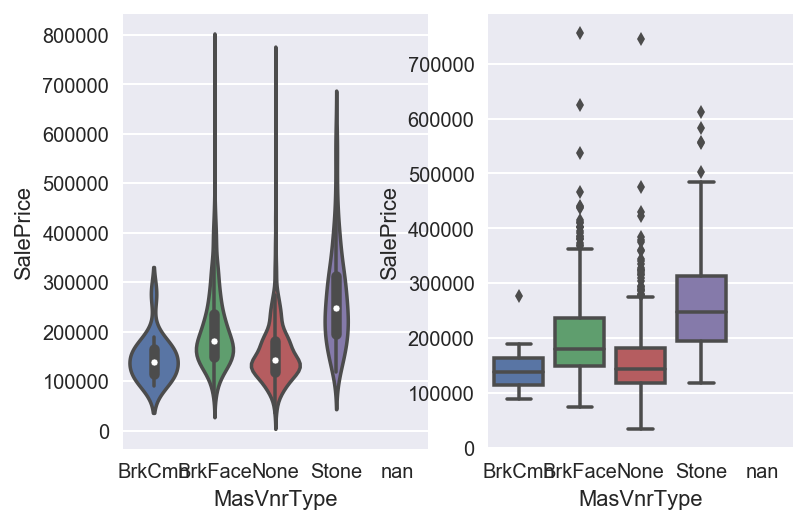

ExterQual
  ExterQual  Counts
0        Ex      52
1        Fa      14
2        Gd     488
3        TA     906


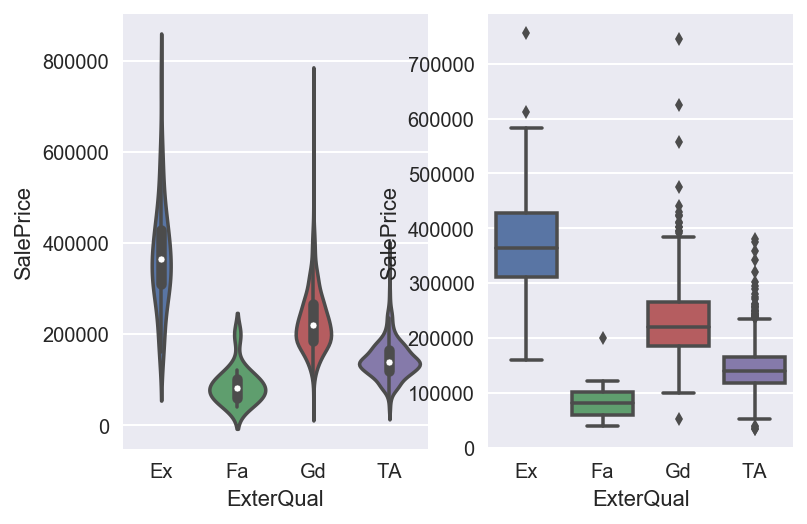

ExterCond
  ExterCond  Counts
0        Ex       3
1        Fa      28
2        Gd     146
3        Po       1
4        TA    1282


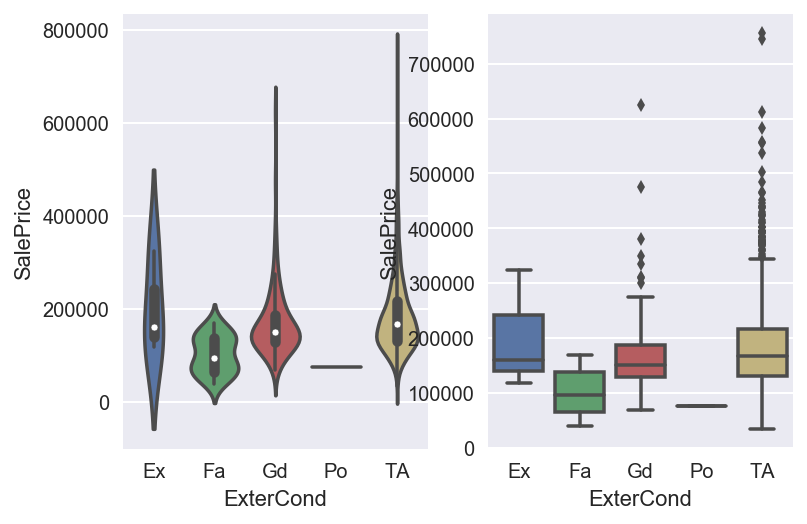

Foundation
  Foundation  Counts
0     BrkTil     146
1     CBlock     634
2      PConc     647
3       Slab      24
4      Stone       6
5       Wood       3


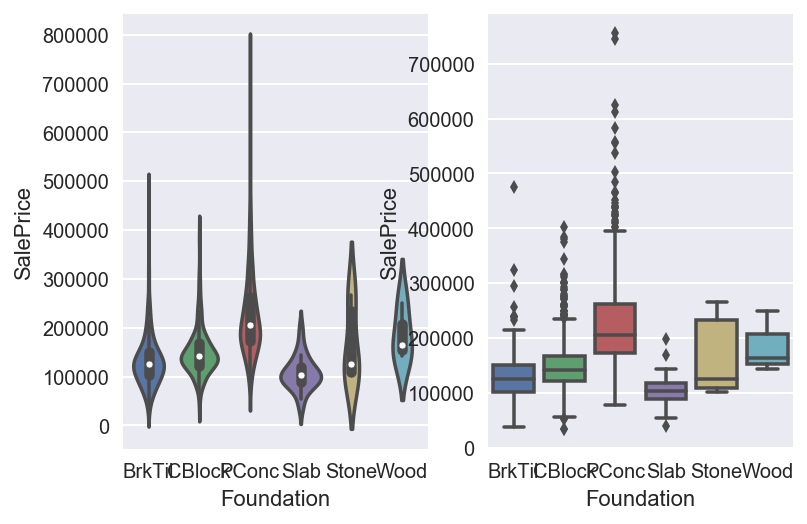

BsmtQual
  BsmtQual  Counts
0       Ex     121
1       Fa      35
2       Gd     618
3       TA     649


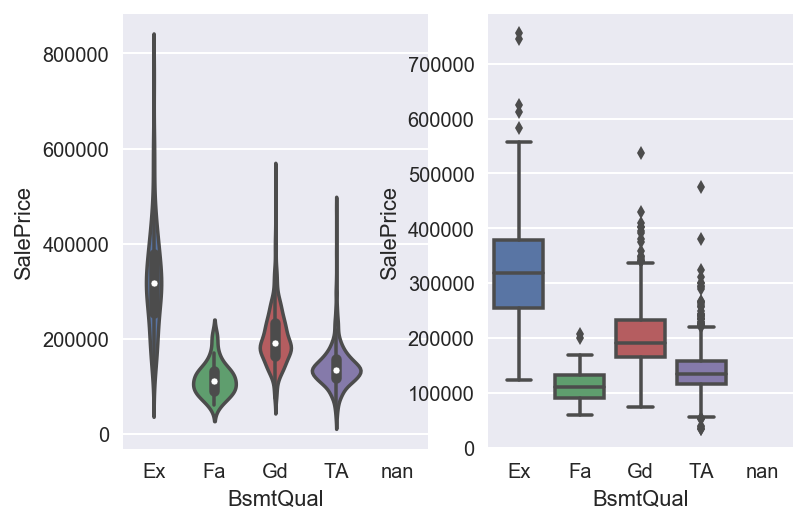

BsmtCond
  BsmtCond  Counts
0       Fa      45
1       Gd      65
2       Po       2
3       TA    1311


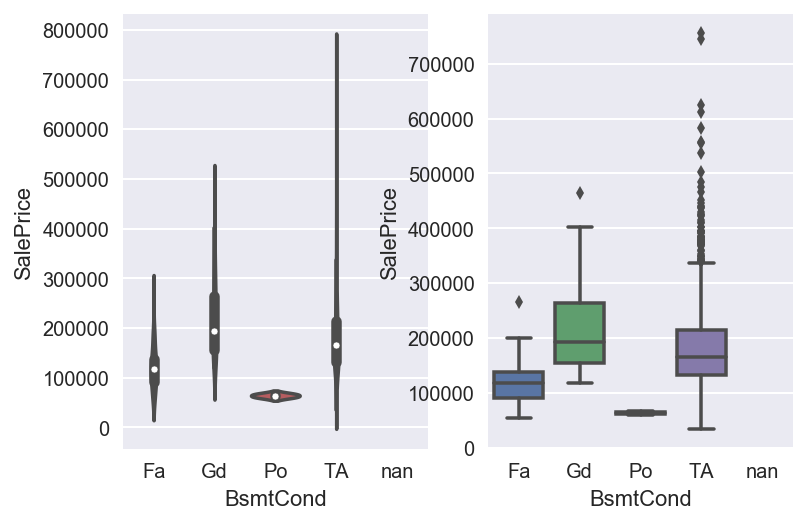

BsmtExposure
  BsmtExposure  Counts
0           Av     221
1           Gd     134
2           Mn     114
3           No     953


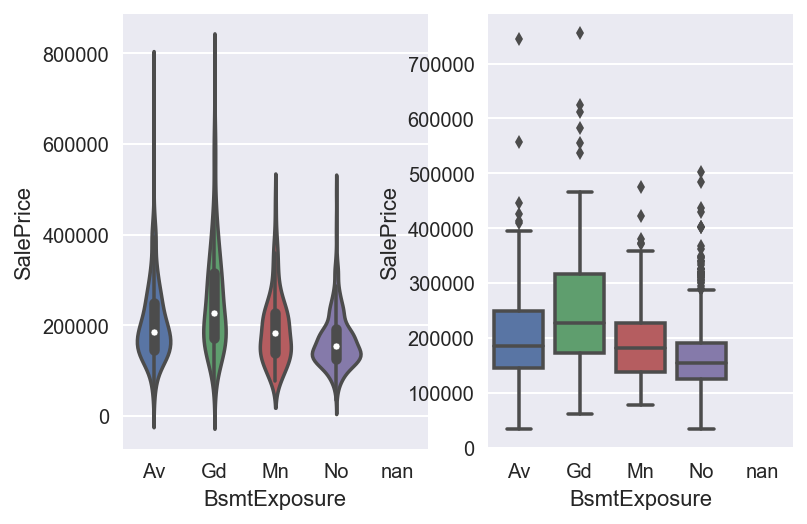

BsmtFinType1
  BsmtFinType1  Counts
0          ALQ     220
1          BLQ     148
2          GLQ     418
3          LwQ      74
4          Rec     133
5          Unf     430


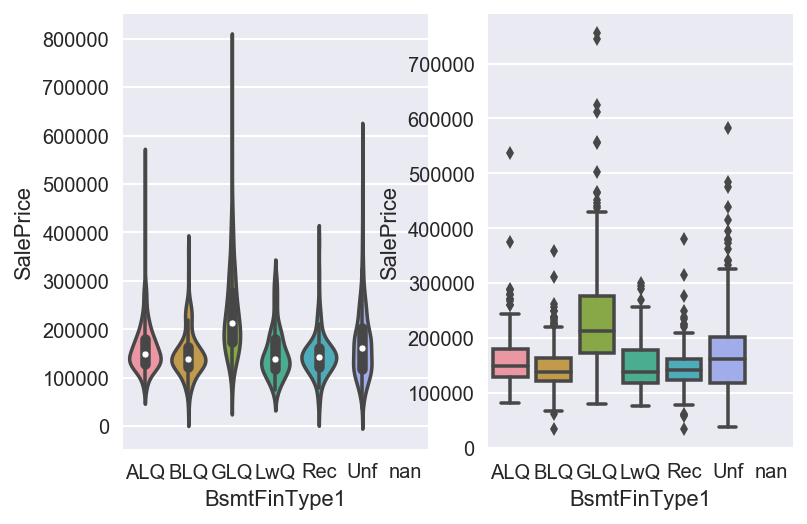

BsmtFinType2
  BsmtFinType2  Counts
0          ALQ      19
1          BLQ      33
2          GLQ      14
3          LwQ      46
4          Rec      54
5          Unf    1256


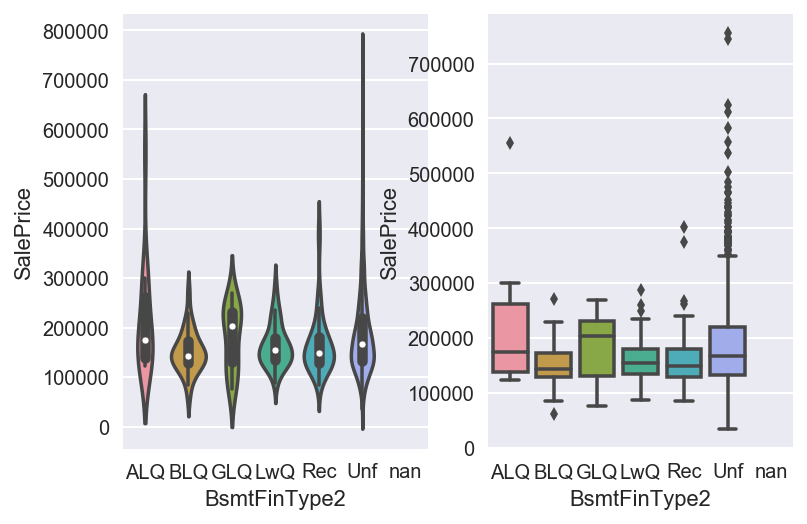

Heating
  Heating  Counts
0   Floor       1
1    GasA    1428
2    GasW      18
3    Grav       7
4    OthW       2
5    Wall       4


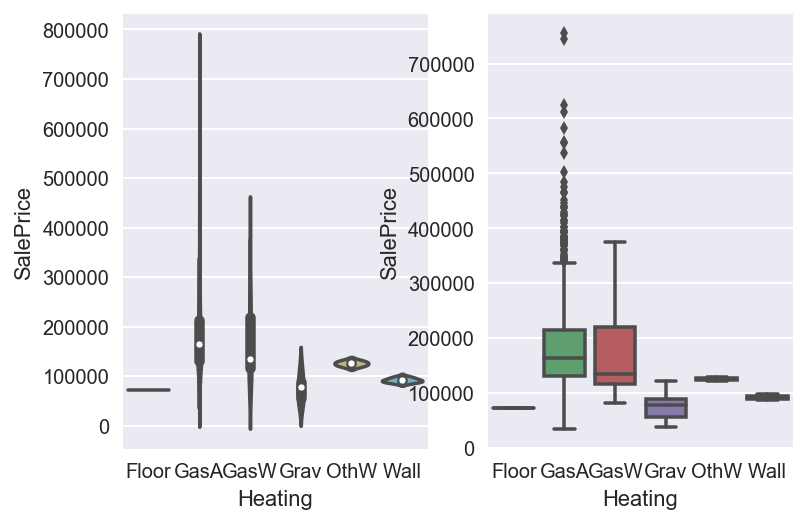

HeatingQC
  HeatingQC  Counts
0        Ex     741
1        Fa      49
2        Gd     241
3        Po       1
4        TA     428


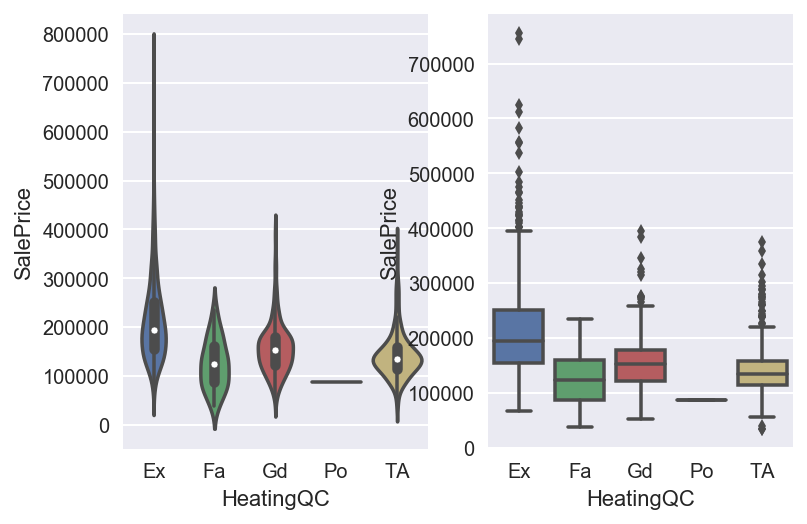

CentralAir
  CentralAir  Counts
0          N      95
1          Y    1365


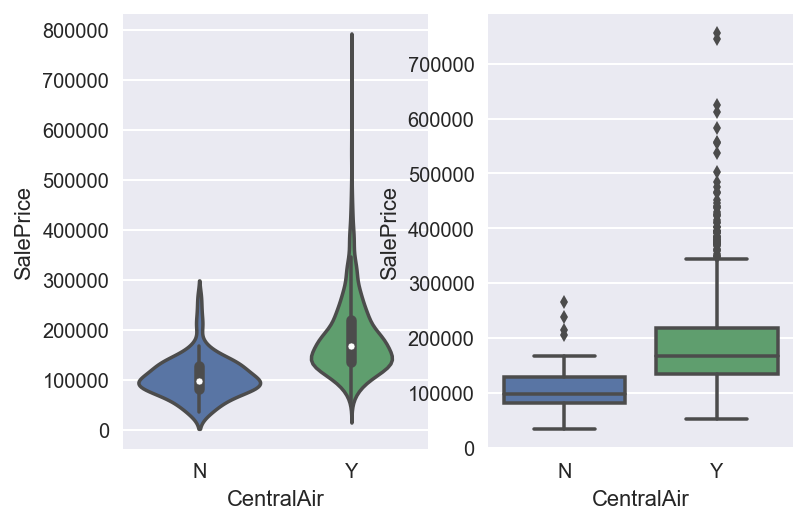

Electrical
  Electrical  Counts
0      FuseA      94
1      FuseF      27
2      FuseP       3
3        Mix       1
4      SBrkr    1334


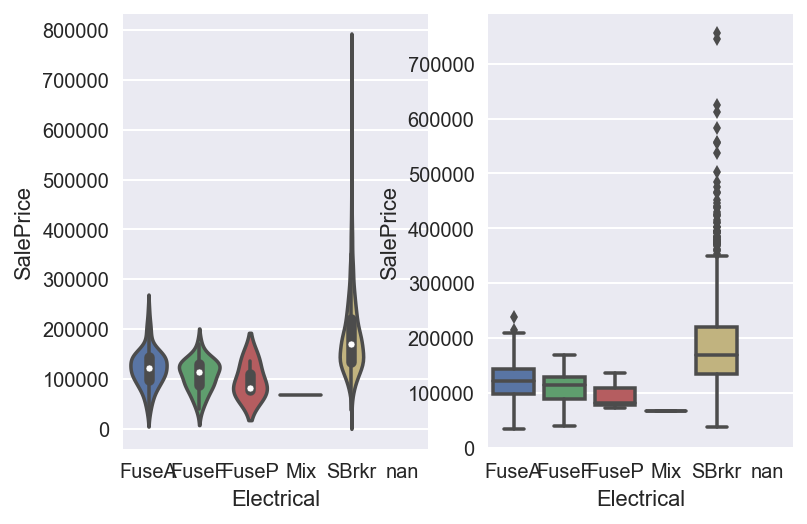

KitchenQual
  KitchenQual  Counts
0          Ex     100
1          Fa      39
2          Gd     586
3          TA     735


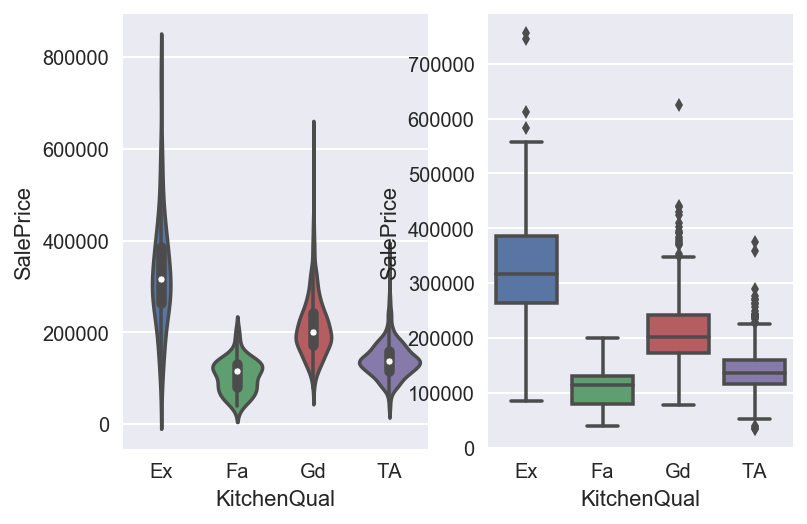

Functional
  Functional  Counts
0       Maj1      14
1       Maj2       5
2       Min1      31
3       Min2      34
4        Mod      15
5        Sev       1
6        Typ    1360


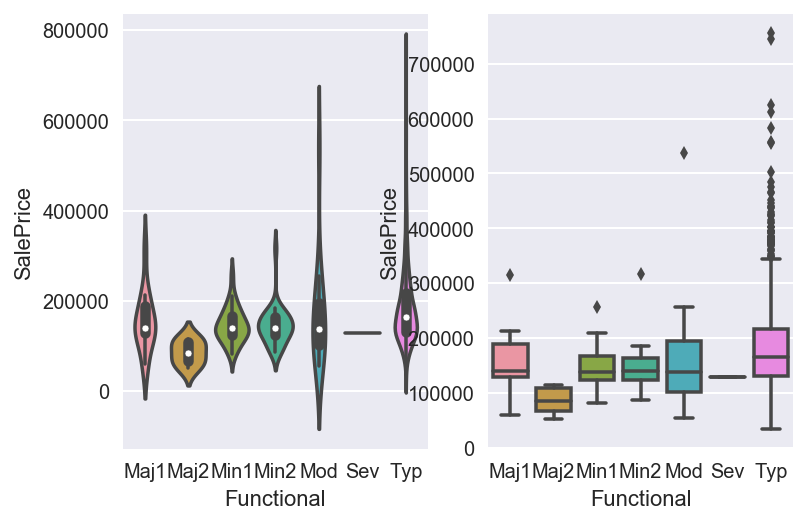

GarageType
  GarageType  Counts
0     2Types       6
1     Attchd     870
2    Basment      19
3    BuiltIn      88
4    CarPort       9
5     Detchd     387


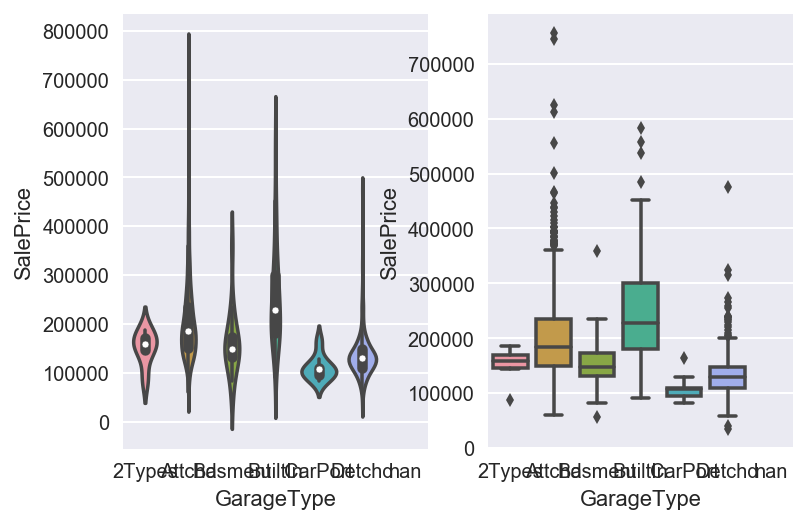

GarageFinish
  GarageFinish  Counts
0          Fin     352
1          RFn     422
2          Unf     605


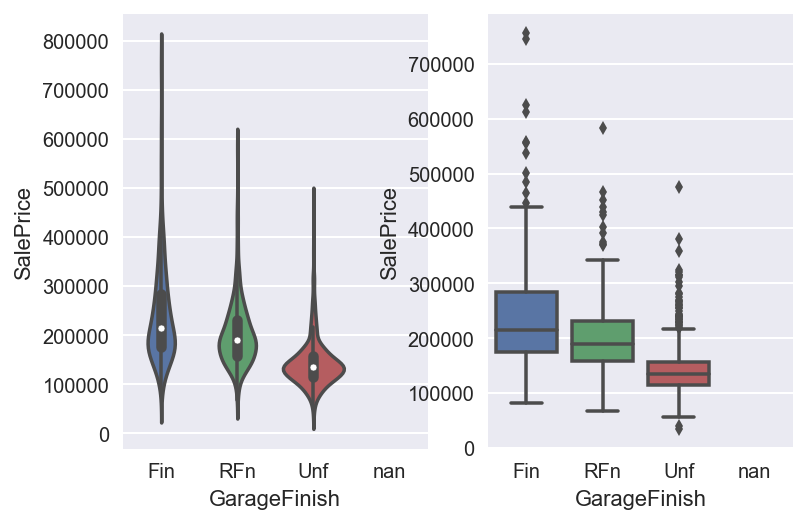

GarageQual
  GarageQual  Counts
0         Ex       3
1         Fa      48
2         Gd      14
3         Po       3
4         TA    1311


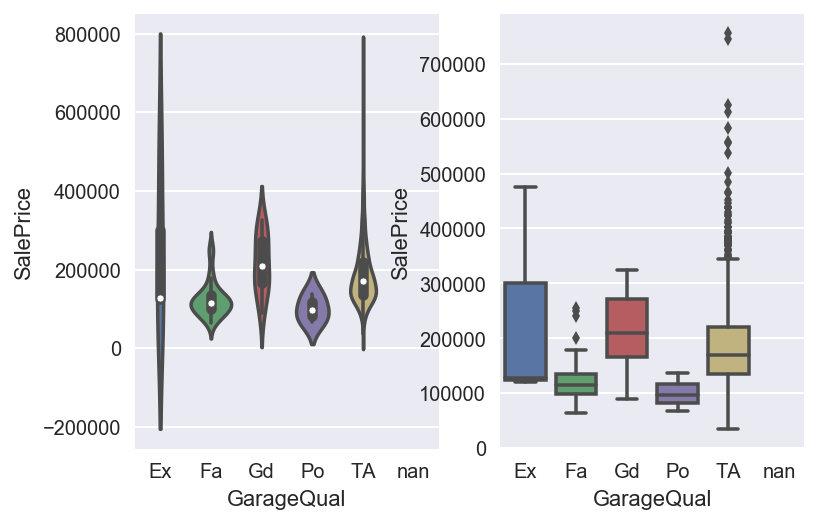

GarageCond
  GarageCond  Counts
0         Ex       2
1         Fa      35
2         Gd       9
3         Po       7
4         TA    1326


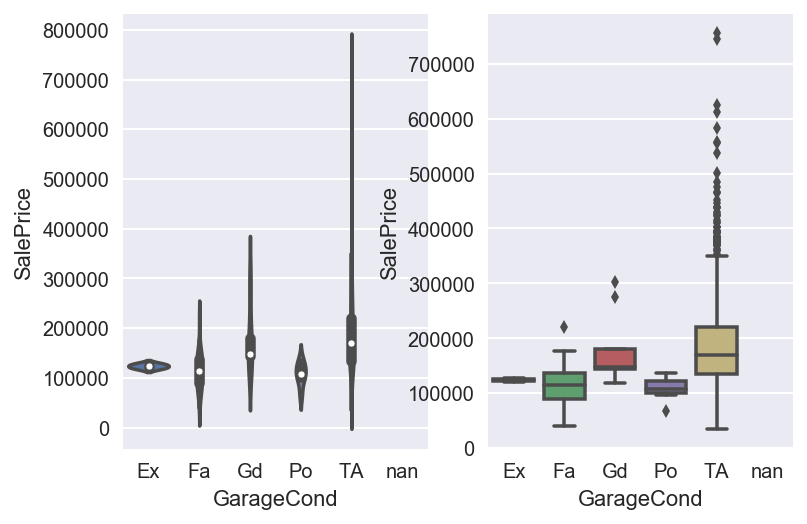

PavedDrive
  PavedDrive  Counts
0          N      90
1          P      30
2          Y    1340


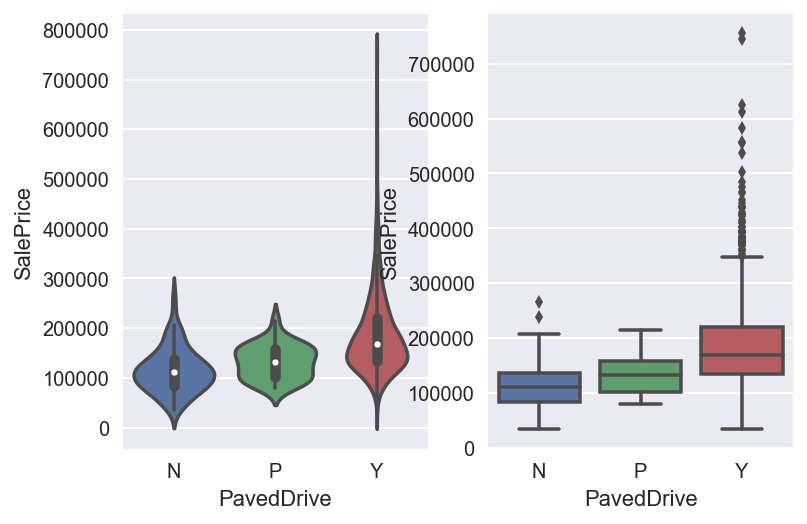

SaleType
  SaleType  Counts
0      COD      43
1      CWD       4
2      Con       2
3    ConLD       9
4    ConLI       5
5    ConLw       5
6      New     122
7      Oth       3
8       WD    1267


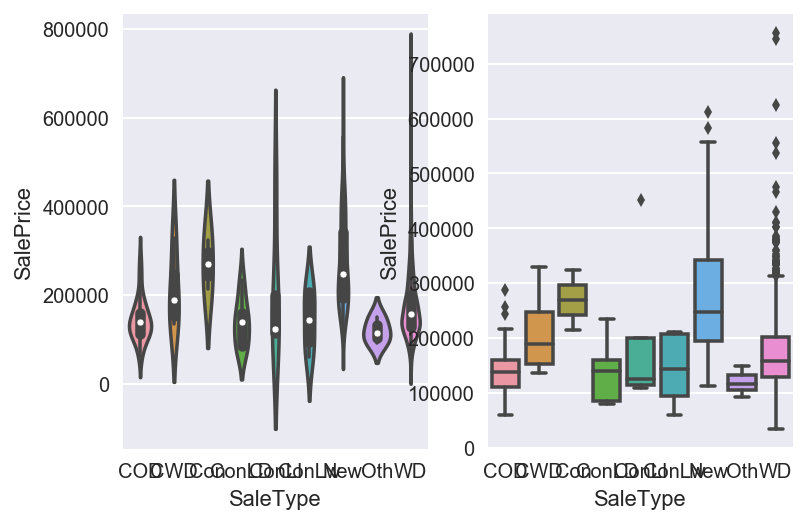

SaleCondition
  SaleCondition  Counts
0       Abnorml     101
1       AdjLand       4
2        Alloca      12
3        Family      20
4        Normal    1198
5       Partial     125


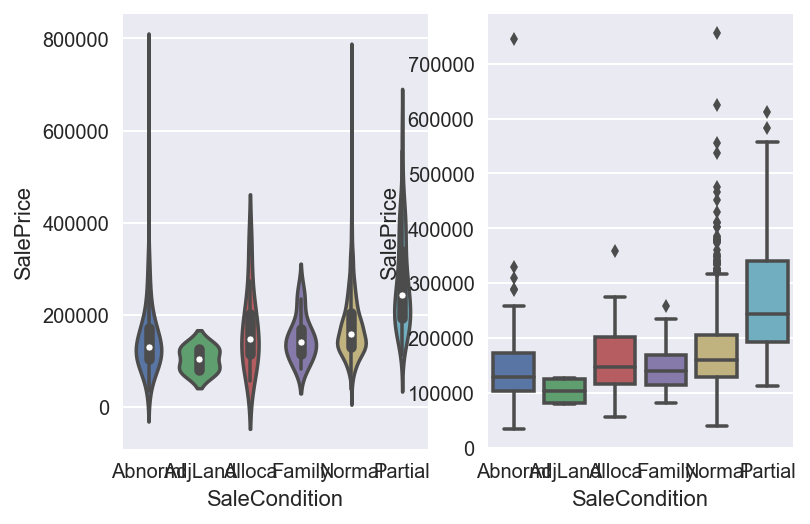

In [5]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
show_viobox(df_str)